In [1]:
import pandas as pd
D = pd.read_table('DATA.txt', header =0)
print(D.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   9394 non-null   int64  
 1   Day     9394 non-null   int64  
 2   Hour    9394 non-null   int64  
 3   PAC     9394 non-null   float64
 4   Tm      9394 non-null   float64
 5   Eff     9394 non-null   float64
 6   Tamb    9394 non-null   float64
 7   RH      9394 non-null   float64
 8   P       9394 non-null   float64
 9   WS      9394 non-null   float64
 10  WD      9394 non-null   float64
 11  TOA     9394 non-null   float64
 12  GHI     9394 non-null   float64
 13  BHI     9394 non-null   float64
 14  DHI     9394 non-null   float64
 15  BNI     9394 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 1.1 MB
None


In [2]:
import numpy as np 
D['PAC'] = np.where ((D.PAC <= 1000) | (D.PAC==0) ,1, D.PAC)
D['PAC'] = np.where ((D.PAC <= 2000) & (D.PAC>1000) ,2, D.PAC)
D['PAC'] = np.where ((D.PAC <= 3000) & (D.PAC>2000) ,3, D.PAC)
D['PAC'] = np.where ((D.PAC <= 4000) & (D.PAC>3000) ,4, D.PAC)
D['PAC'] = np.where ((D.PAC <= 5000) & (D.PAC>4000) ,5, D.PAC)
D['PAC'] = np.where ((D.PAC <= 6500) & (D.PAC>5000) ,6, D.PAC)
D.PAC


0       4.0
1       4.0
2       6.0
3       6.0
4       5.0
       ... 
9389    1.0
9390    1.0
9391    1.0
9392    2.0
9393    5.0
Name: PAC, Length: 9394, dtype: float64

In [3]:
print (pd.value_counts (D.PAC))

1.0    3106
6.0    1939
5.0    1762
2.0    1029
4.0     863
3.0     695
Name: PAC, dtype: int64


In [60]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Supposons que D est votre DataFrame et num_classes est le nombre total de classes
y = to_categorical(D.PAC - 1, num_classes=6)


# Utilisez tf.compat.v1.get_default_graph() 
graph = tf.compat.v1.get_default_graph()

# Compilation du modèle avec la perte mise à jour
model.compile(loss=tf.compat.v1.losses.sparse_softmax_cross_entropy,
              optimizer=Adam(learning_rate=0.1),
              metrics=['mean_squared_error'])
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [22]:
#verification
import numpy as np
print(np.sum(y,axis=0))

[3106. 1029.  695.  863. 1762. 1939.]


In [23]:
#changer l'ordre des colonnes
D = D [['PAC','Hour','Tm','Tamb','TOA','GHI']]
#Isoler les descripteurs
X = D.iloc [:,1:]

In [32]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import numpy 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XTrainStd = scaler.fit_transform(XTrain)
XTestStd = scaler.fit_transform(XTest)
print(numpy.mean(XTrain,axis=0))

Hour      11.865469
Tm        56.322178
Tamb      19.606982
TOA     6273.807769
GHI     3771.936256
dtype: float64


In [43]:
# modèle de réseau de neurones
from keras.models import Sequential
from keras.layers import Activation,Dense
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from tensorflow.keras.optimizers import Adam
#instanciation du modèle
model = Sequential()
#architecture
model.add(Dense(15,input_dim=5,activation= 'relu'))
model.add(Dense(10,input_dim=5,activation= 'relu'))
model.add(Dense(6, activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.1)
#compilation - algorithme d'apprentissage 
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
#apprentissage
history = model.fit(XTrain, yTrain, epochs=100, batch_size=10, verbose=0)

In [44]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 15)                90        
                                                                 
 dense_34 (Dense)            (None, 10)                160       
                                                                 
 dense_35 (Dense)            (None, 6)                 66        
                                                                 
Total params: 316 (1.23 KB)
Trainable params: 316 (1.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
#Evaluation
score=model.evaluate(XTestStd,yTest)
print(score)
print("test_lost:", 100*score[0])
print("test_Accuracy:", 100*score[1])
print('Model errore rate : %.2f%%' % (100-score[1]*100 ))

59/59 [==============================] - 4s 1ms/step - loss: 1.6743 - accuracy: 0.3294
[1.674330234527588, 0.32943055033683777]
test_lost: 167.4330234527588
test_Accuracy: 32.94305503368378
Model errore rate : 67.06%


In [48]:
#vérifier la performance du modèle 
import numpy as np 
x=XTestStd[1]
x = np.reshape (x, (-1,5))
print(x)

[[0.25       0.59649368 0.49325064 0.58372385 0.39830173]]


In [49]:
print(yTest[1])

[0. 1. 0. 0. 0. 0.]


In [58]:
def Analysis(etat):
    objects = ('Class1' , 'Class2', 'Class3','Class4','Class5','Class6')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos,etat,align='center',alpha=0.5)
    plt.xticks(y_pos,objects,rotation=45)
    plt.ylabel('Pourcentage')
    plt.title('Classe')
    
    plt.show()

1/1 [==============================] - 0s 71ms/step


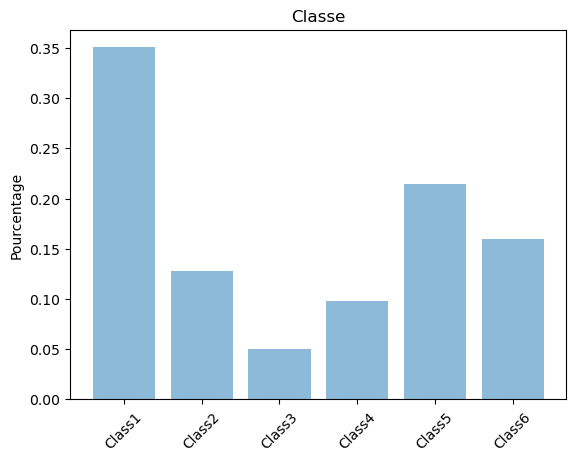

<function matplotlib.pyplot.show(close=None, block=None)>

In [59]:
import matplotlib.pyplot as plt 
Custom = model.predict (x)
Analysis(Custom[0])
plt.show